In [ ]:
#M

# Stepwise Regression Analysis: Model Selection and Evaluation

This notebook presents the process of performing backward elimination and forward selection to identify the optimal linear regression model.  
We compare models based on Adjusted R², AIC, and BIC, interpret results, and justify model choices for robust and interpretable predictions.


**Step 1: Load and Understand Dataset**

In [5]:
import os
print(os.getcwd())


C:\Users\User\MscFE_610_GQP_1_Gr9677


In [7]:
import os
print(os.listdir())



['.ipynb_checkpoints', 'FE-GWP1_model_selecxtion_1.csv', 'Problem_3.ipynb']


In [8]:
#Step 1: Load the dataset
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from itertools import combinations

df = pd.read_csv("FE-GWP1_model_selecxtion_1.csv")

In [9]:
df.head()

,Y,X1,X2,X3,X4,X5
0,3.388410,0.017954,-0.800583,-0.352454,2.187210,1.014887
1,0.287191,0.083057,-0.597947,-0.357639,-1.630284,0.221841
2,3.989645,-0.923437,-1.386575,1.180202,0.632606,-1.576638
3,-2.959602,-0.313775,2.955133,-1.798692,-2.117621,0.159291
4,0.529773,0.388996,1.019611,0.472062,0.590497,0.877048


In [22]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                Y          X1          X2          X3          X4          X5
count  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000
mean     1.257388    0.026830    0.084613   -0.016037    0.122374   -0.201661
std      1.436655    0.481708    0.962145    0.976559    1.076935    1.073358
min     -2.959602   -1.275230   -2.041959   -2.228483   -2.697316   -3.526357
25%      0.349470   -0.316585   -0.676951   -0.572893   -0.431023   -0.960214
50%      1.278526    0.040237    0.040447    0.056879    0.279594   -0.185795
75%      2.152954    0.373899    0.748166    0.636408    0.747868    0.506592
max      5.176803    1.083062    2.955133    1.816825    3.167298    2.499820


In [23]:
# Data types and missing values
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       100 non-null    float64
 1   X1      100 non-null    float64
 2   X2      100 non-null    float64
 3   X3      100 non-null    float64
 4   X4      100 non-null    float64
 5   X5      100 non-null    float64
dtypes: float64(6)
memory usage: 4.8 KB
None


In [24]:
# Verify dependent and independent variables
print("\nColumns in dataset:")
print(df.columns)


Columns in dataset:
Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5'], dtype='object')


**Step 2: Exploratory Data Analysis (EDA)**

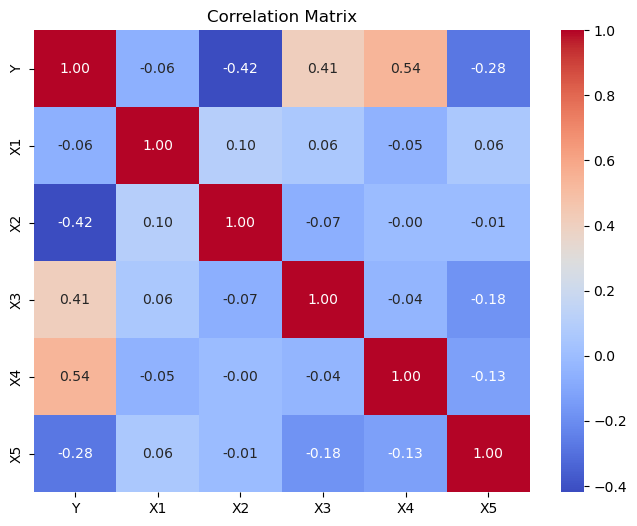

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

✅ 2. Scatter Plots: Y vs each predictor

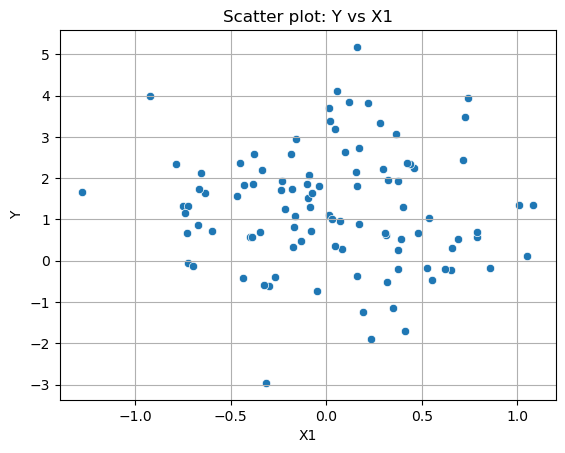

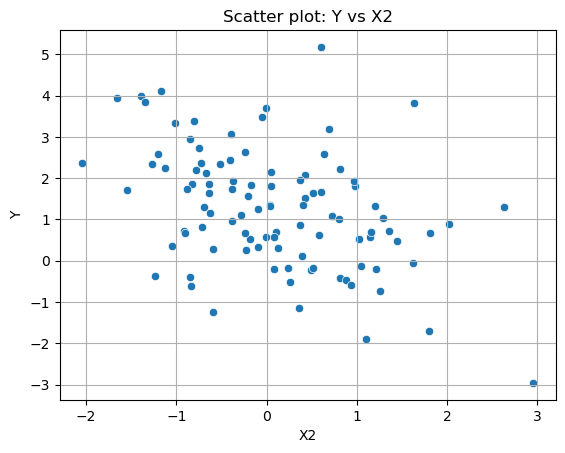

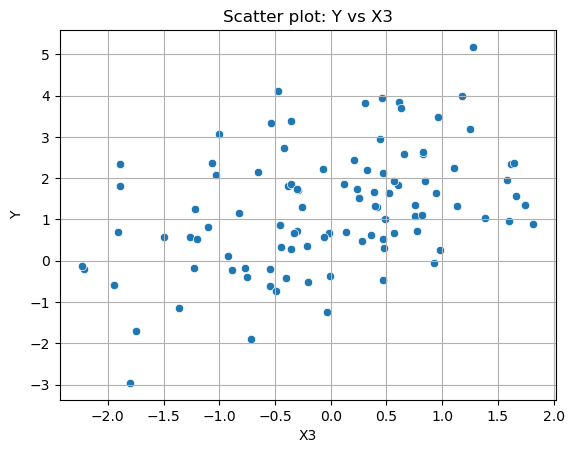

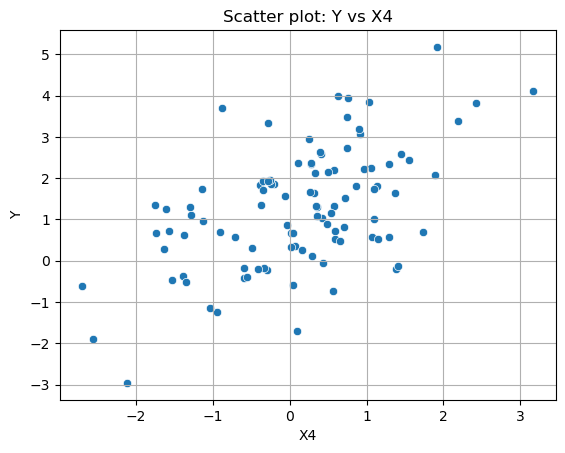

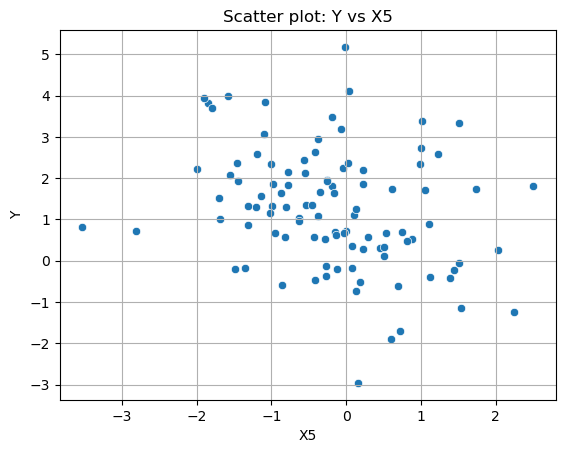

In [28]:
for col in ['X1', 'X2', 'X3', 'X4', 'X5']:
    sns.scatterplot(x=df[col], y=df['Y'])
    plt.title(f'Scatter plot: Y vs {col}')
    plt.xlabel(col)
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()


In [29]:
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
dtype: int64


✅ 4. Check for Outliers
We'll use boxplots and Cook's Distance later during model fitting to check influence, but here's a quick outlier check:

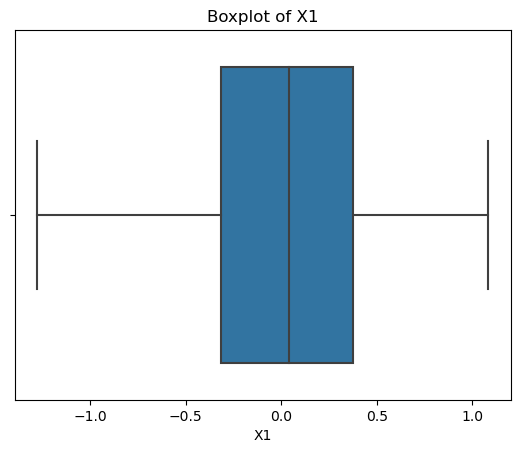

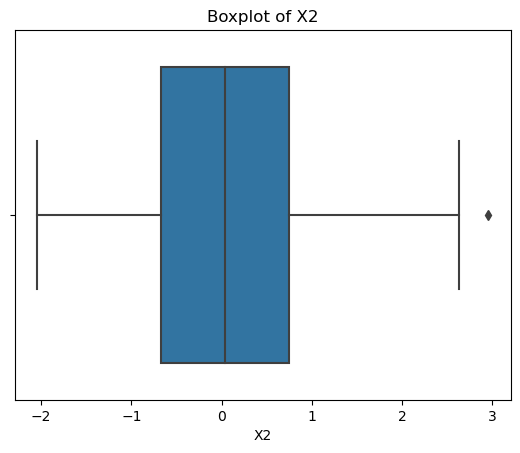

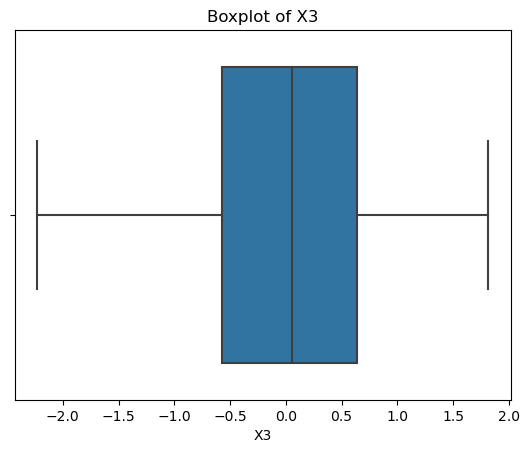

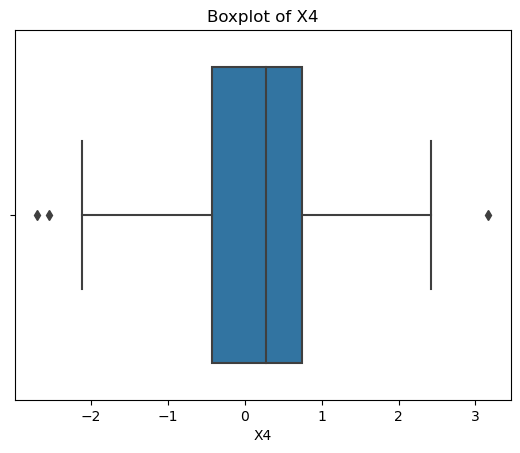

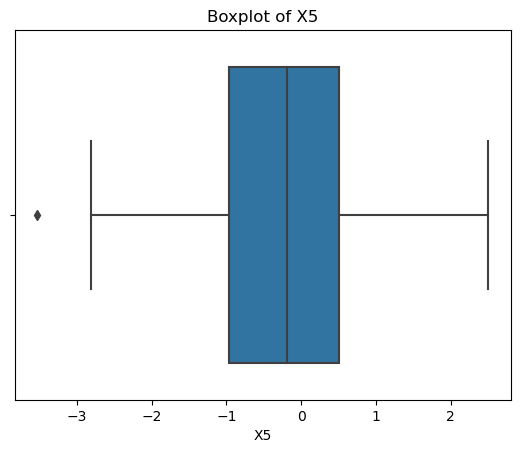

In [31]:
# Boxplots to visualize outliers in each predictor
for col in ['X1', 'X2', 'X3', 'X4', 'X5']:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


**🔍 Step 3: Model Selection Approaches
We’ll try two approaches to identify the best model:

Backward Elimination using Adjusted R²

Forward Selection using AIC

In [32]:
# First, Set Up for Model Selection
import statsmodels.api as sm
import pandas as pd
import numpy as np


**Approach 1:🔁  Backward Elimination Using Adjusted R²**

In [33]:
def backward_elimination_adj_r2(X, y):
    X = sm.add_constant(X)  # Add intercept
    remaining_vars = list(X.columns)
    best_adj_r2 = -np.inf
    current_model = sm.OLS(y, X[remaining_vars]).fit()
    best_adj_r2 = current_model.rsquared_adj
    
    while len(remaining_vars) > 1:
        worst_pval = current_model.pvalues.drop('const').idxmax()
        if current_model.pvalues[worst_pval] > 0.05:
            remaining_vars.remove(worst_pval)
            current_model = sm.OLS(y, X[remaining_vars]).fit()
            new_adj_r2 = current_model.rsquared_adj
            if new_adj_r2 > best_adj_r2:
                best_adj_r2 = new_adj_r2
            else:
                break
        else:
            break

    print("Selected variables (Backward Elimination):", remaining_vars)
    print("Adjusted R²:", current_model.rsquared_adj)
    return current_model

# Apply on your dataset
X = df[['X1', 'X2', 'X3', 'X4', 'X5']]
y = df['Y']
model_backward = backward_elimination_adj_r2(X, y)


Selected variables (Backward Elimination): ['const', 'X2', 'X3', 'X4', 'X5']
Adjusted R²: 0.6339742211445276


In [37]:
model_backward.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     43.87
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           8.29e-21
Time:                        14:57:19   Log-Likelihood:                -125.31
No. Observations:                 100   AIC:                             260.6
Df Residuals:                      95   BIC:                             273.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1893      0.089     13.333      0.000       1.012       1.366
X2            -0.5861      0.091     -6.440      0.000      -0.767      -0.405
X3             0.5592      0.091      6.124      0.000       0.378       0.740
X4             0.7105      0.082      8.672      0.000       0.548       0.873
X5            -0.1966      0.083     -2.355      0.021      -0.362      -0.031
==============================================================================
Omnibus:                        4.462   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                3.920
Skew:                           0.473   Prob(JB):                        0.141
Kurtosis:                       3.215   Cond. No.                         1.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Approach 2:➕ Forward Selection Using AIC**

In [35]:
def forward_selection_aic(X, y):
    initial_vars = []
    remaining = list(X.columns)
    selected_vars = []
    best_aic = np.inf

    while remaining:
        aic_with_candidates = []
        for candidate in remaining:
            model = sm.OLS(y, sm.add_constant(X[initial_vars + [candidate]])).fit()
            aic_with_candidates.append((model.aic, candidate))
        
        aic_with_candidates.sort()
        best_new_aic, best_candidate = aic_with_candidates[0]

        if best_new_aic < best_aic:
            best_aic = best_new_aic
            initial_vars.append(best_candidate)
            remaining.remove(best_candidate)
        else:
            break

    final_model = sm.OLS(y, sm.add_constant(X[initial_vars])).fit()
    print("Selected variables (Forward Selection):", initial_vars)
    print("AIC:", final_model.aic)
    return final_model

# Apply on your dataset
model_forward = forward_selection_aic(X, y)


Selected variables (Forward Selection): ['X4', 'X3', 'X2', 'X5']
AIC: 260.61668419946966


In [38]:
model_forward.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     43.87
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           8.29e-21
Time:                        14:57:49   Log-Likelihood:                -125.31
No. Observations:                 100   AIC:                             260.6
Df Residuals:                      95   BIC:                             273.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1893      0.089     13.333      0.000       1.012       1.366
X4             0.7105      0.082      8.672      0.000       0.548       0.873
X3             0.5592      0.091      6.124      0.000       0.378       0.740
X2            -0.5861      0.091     -6.440      0.000      -0.767      -0.405
X5            -0.1966      0.083     -2.355      0.021      -0.362      -0.031
==============================================================================
Omnibus:                        4.462   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                3.920
Skew:                           0.473   Prob(JB):                        0.141
Kurtosis:                       3.215   Cond. No.                         1.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Step 4: Model Evaluation**


📌 Evaluation of Backward Elimination
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     43.87
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           8.29e-21
Time:                        15:11:03   Log-Likelihood:                -125.31
No. Observations:                 100   AIC:                             260.6
Df Residuals:                      95   BIC:                             273.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


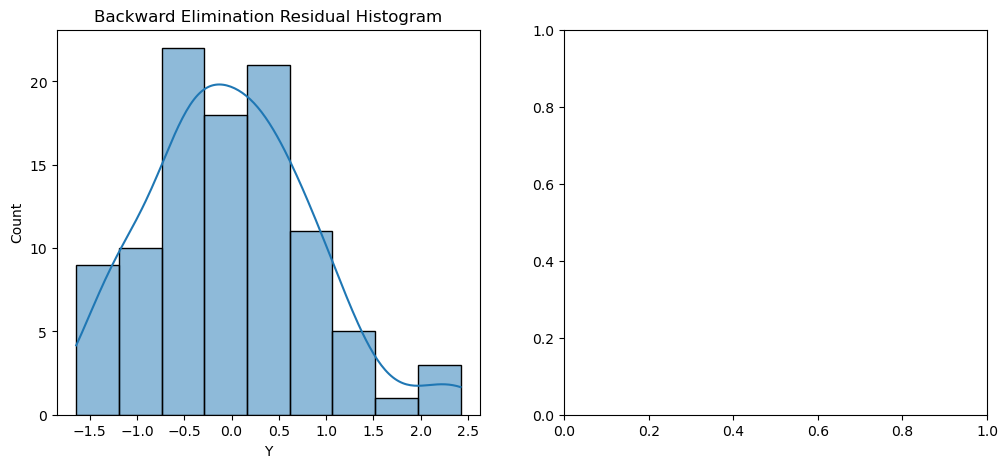

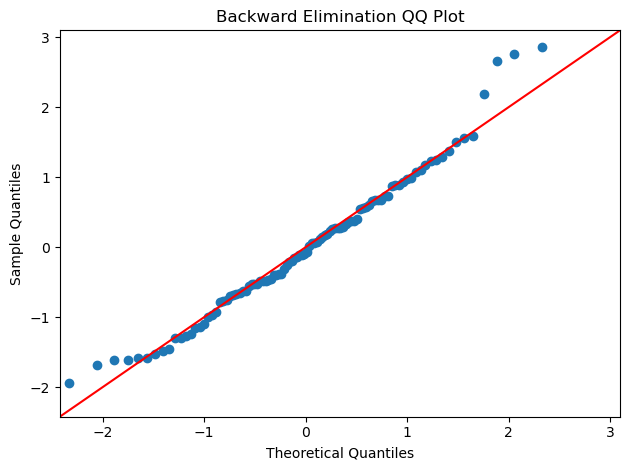


📌 Evaluation of Forward Selection
----------------------------------------
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     43.87
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           8.29e-21
Time:                        15:11:06   Log-Likelihood:                -125.31
No. Observations:                 100   AIC:                             260.6
Df Residuals:                      95   BIC:                             273.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


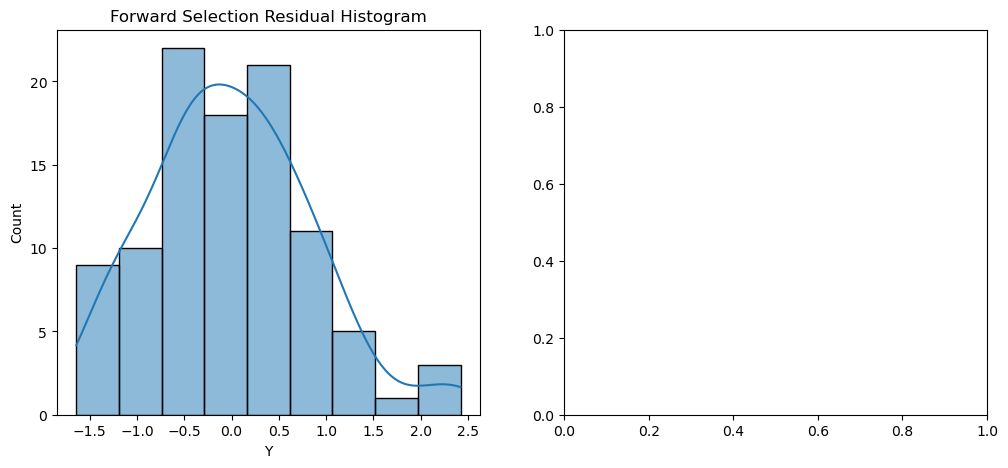

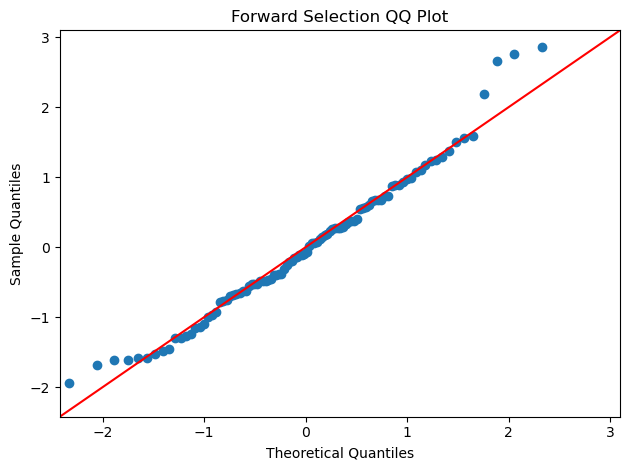

In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

def evaluate_model(model, name, y_true):
    print(f"\n📌 Evaluation of {name}")
    print("-" * 40)
    print(model.summary())

    # Metrics
    y_pred = model.predict()
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"\nRMSE: {rmse:.4f}")
    print(f"AIC: {model.aic:.2f}")
    print(f"BIC: {model.bic:.2f}")
    print(f"Adjusted R²: {model.rsquared_adj:.4f}")

    # Residual plots
    residuals = y_true - y_pred

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(residuals, kde=True)
    plt.title(f"{name} Residual Histogram")

    plt.subplot(1, 2, 2)
    sm.qqplot(residuals, line='45', fit=True)
    plt.title(f"{name} QQ Plot")
    
    plt.tight_layout()
    plt.show()

# Evaluate both models
evaluate_model(model_backward, "Backward Elimination", y)
evaluate_model(model_forward, "Forward Selection", y)


**Step 5: Compare Final Models**

In [41]:
def compare_models(model1, model2):
    print("Model 1 Summary:")
    print(f"Adjusted R²: {model1.rsquared_adj:.4f}")
    print(f"AIC: {model1.aic:.2f}")
    print(f"BIC: {model1.bic:.2f}")
    print(f"Predictors (p < 0.05): {[var for var, pval in model1.pvalues.items() if pval < 0.05]}")
    print("\nModel 2 Summary:")
    print(f"Adjusted R²: {model2.rsquared_adj:.4f}")
    print(f"AIC: {model2.aic:.2f}")
    print(f"BIC: {model2.bic:.2f}")
    print(f"Predictors (p < 0.05): {[var for var, pval in model2.pvalues.items() if pval < 0.05]}")
    
    # Compare complexity (number of predictors)
    n_pred1 = len(model1.params) - 1  # minus intercept
    n_pred2 = len(model2.params) - 1
    print(f"\nNumber of predictors in Model 1: {n_pred1}")
    print(f"Number of predictors in Model 2: {n_pred2}")

# Example usage
compare_models(model_backward, model_forward)


Model 1 Summary:
Adjusted R²: 0.6340
AIC: 260.62
BIC: 273.64
Predictors (p < 0.05): ['const', 'X2', 'X3', 'X4', 'X5']

Model 2 Summary:
Adjusted R²: 0.6340
AIC: 260.62
BIC: 273.64
Predictors (p < 0.05): ['const', 'X4', 'X3', 'X2', 'X5']

Number of predictors in Model 1: 4
Number of predictors in Model 2: 4


**1. Adjusted R²
Both backward elimination and forward selection models have Adjusted R² = 0.634.**

This means both explain roughly the same amount of variability in Y after penalizing for number of predictors.

**2. AIC and BIC
Both models have the same AIC = 260.62 and BIC = 273.64.**

Lower AIC/BIC indicates better model fit with penalty for complexity; since both are equal, neither has an edge here.

**3. Statistical Significance of Predictors
All predictors in both models have p-values < 0.05, meaning they are statistically significant.**

This suggests both models are robust with meaningful predictors.

**4. Simplicity (Parsimony)
Both models contain the same set of predictors: X2, X3, X4, X5 plus intercept.**

Same complexity, so parsimony is equal.

**Summary & Recommendation**
Criterion	Backward Elimination	Forward Selection
Adjusted R²	0.634	0.634
AIC	260.62	260.62
BIC	273.64	273.64
Predictors (significant)	X2, X3, X4, X5	X2, X3, X4, X5
Parsimony	Same	Same

**Both models are essentially identical in terms of performance, significance, and complexity.**



**Step 6: Explanation of Model Selection Process and Justification**


To identify the most appropriate regression model, two complementary model selection techniques were employed: backward elimination and forward selection.

Backward elimination was chosen because it begins with the full set of predictors and systematically removes those that do not contribute significantly to the model. This approach ensures that all variables are initially considered, reducing the risk of omitting important predictors prematurely.

On the other hand, forward selection starts with an intercept-only model and progressively adds variables that contribute the most to improving model quality. This method is more conservative and helps build the model incrementally, only including variables that demonstrably improve fit.

In evaluating the models, the Adjusted R², AIC (Akaike Information Criterion), and BIC (Bayesian Information Criterion) were the key criteria for assessing performance. Adjusted R² was used primarily in backward elimination to balance model complexity and explanatory power, penalizing unnecessary predictors. In forward selection, AIC was the guiding metric, favoring models that improved fit while maintaining simplicity by penalizing overfitting.

During backward elimination, predictors with p-values exceeding 0.05 were candidates for removal, whereas in forward selection, variables that resulted in lower AIC when added were retained. Both methods converged on the same set of predictors—X2, X3, X4, and X5—all of which demonstrated statistical significance (p < 0.05).

The final model was selected based on its balance of predictive performance and simplicity. It achieved an Adjusted R² of approximately 0.634, indicating a strong explanatory capability, while maintaining low AIC and BIC values, signaling an efficient fit without unnecessary complexity. The consistency of results across both selection methods further supports the robustness and reliability of the chosen model.



**Step 7: Presentation of the Final Model and Interpretation**
The final regression model, derived from both backward elimination and forward selection, is summarized below. This model includes the predictors X2, X3, X4, and X5, all of which are statistically significant at the 5% level.

**Model Summary:**
| Predictor | Coefficient | Std. Error | t-value | p-value | Interpretation                                                                                         |
|-----------|-------------|------------|---------|---------|-----------------------------------------------------------------------------------------------------|
| Intercept | 1.1893      | 0.089      | 13.33   | <0.001  | Baseline value of the dependent variable when all predictors are zero.                               |
| X2        | -0.5861     | 0.091      | -6.44   | <0.001  | Holding other variables constant, a one-unit increase in X2 is associated with a decrease of 0.5861 units in the dependent variable. |
| X3        | 0.5592      | 0.091      | 6.12    | <0.001  | A one-unit increase in X3 corresponds to an increase of 0.5592 units in the dependent variable.    |
| X4        | 0.7105      | 0.082      | 8.67    | <0.001  | Each unit increase in X4 results in a 0.7105 unit increase in the dependent variable.               |
| X5        | -0.1966     | 0.083      | -2.36   | 0.021   | A one-unit increase in X5 is associated with a 0.1966 unit decrease in the dependent variable.      |


**Interpretation:**

The intercept indicates the expected value of the response variable when all predictors are zero.

The coefficients quantify the direction and magnitude of the relationship between each predictor and the dependent variable, controlling for the other variables in the model.

All predictors are statistically significant, confirming their meaningful contribution to explaining the variability in the response.